In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use(Path('ipynb', 'nb_plotsheet.mplstyle'))
#
path_data = Path('data', 'plot', 'PhD')

Current working directory: /home/opisthofulax/Documents/PhD/projects/complex-networks/lrgsglib


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71568/2134706768.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")


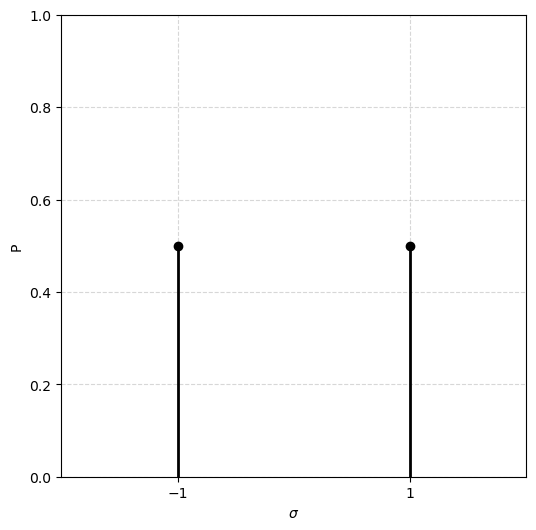

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Delta positions and weights
positions = [-1, 1]
weights = [0.5, 0.5]  # Equal weight for each delta

# Plot settings
plt.figure(figsize=(6, 6))
for pos, w in zip(positions, weights):
    plt.vlines(pos, 0, w, colors='black', linewidth=2)
    plt.plot(pos, w, 'ko')  # point marker

plt.ylim(0, 1)
plt.xlim(-2, 2)
plt.xticks(positions)
plt.xlabel("$\sigma$")
plt.ylabel("P")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [2]:
size = 80
k_avg = 10
pflip = 0.25
p = k_avg / size

In [3]:
er = ErdosRenyi(size, p, pflip=pflip, path_data=path_data)
er.flip_random_fract_edges()
er.compute_k_eigvV(10)
# pos = signed_spectral_layout(er.G)
pos = nx.spring_layout(er.G) 

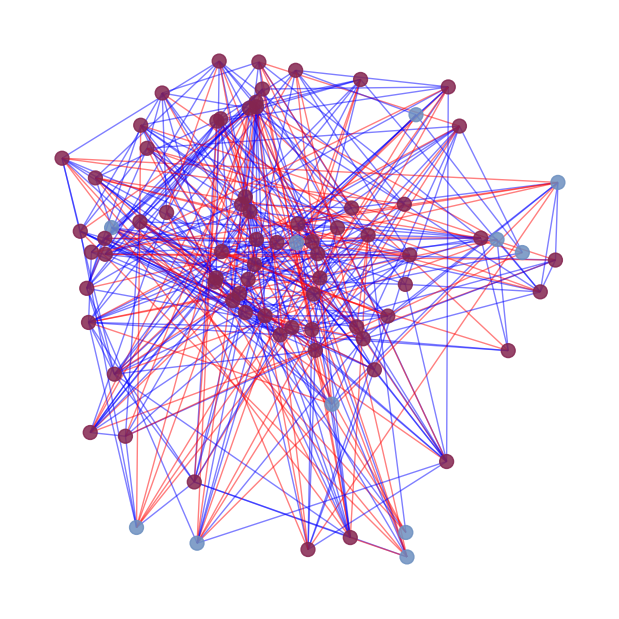

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
nodes = nx.draw_networkx_nodes(er.G, pos=pos, ax=ax, node_size=100,
                               node_color=er.get_eigV_bin_check(1),
                               cmap=credcblu, alpha=0.85)
nx.draw_networkx_edges(er.G, pos=pos, ax=ax, edge_color=er.get_edge_color(), alpha=0.5)
fig.tight_layout(pad=0)
ax.axis('off')
# fig.colorbar(nodes, ax=ax, shrink=0.7)
fig.savefig(path_data / 'er_flip.pdf', transparent=True, bbox_inches='tight')

In [5]:
side = 12

In [6]:
lrew = Lattice2D(side, pflip=pflip, prew=0.05, with_positions=True, pbc=False, path_data=path_data)
lrew.flip_random_fract_edges()
lrew.compute_k_eigvV(10)
pos=lrew.get_node_attributes('pos')

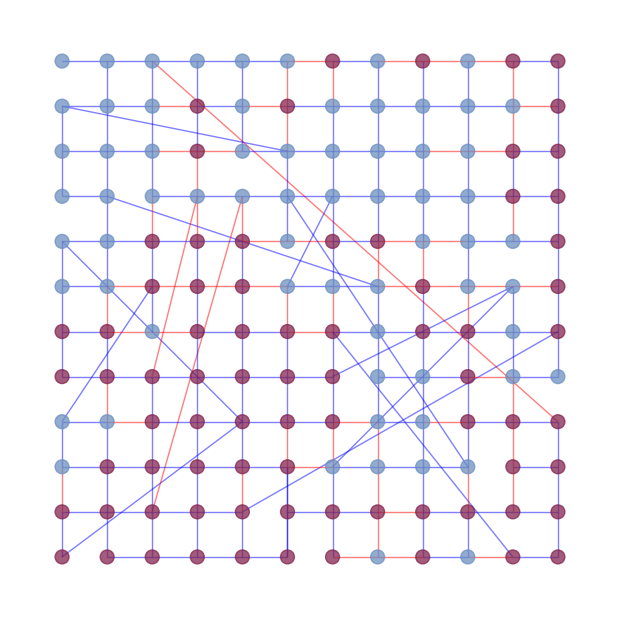

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
nodes = nx.draw_networkx_nodes(lrew.G, pos=pos, ax=ax, node_size=100,
                               node_color=lrew.get_eigV_bin_check(1),
                               cmap=credcblu, alpha=0.75)
nx.draw_networkx_edges(lrew.G, pos=pos, ax=ax, edge_color=lrew.get_edge_color(), alpha=0.5)
fig.tight_layout(pad=0)
ax.axis('off')
fig.savefig(path_data / 'lrew_flip.pdf', transparent=True, bbox_inches='tight')

In [31]:
side = 5

In [48]:
ldil = Lattice3D(side, pdil=0.25, with_positions=True, pbc=False, path_data=path_data)
ldil.set_edges_random_normal()
ldil.compute_k_eigvV(10)
pos = ldil.H.nodes(data='pos')

In [36]:
colors = [
    (0.0, (1, 0, 0)),   # red
    (1.0, (0, 0, 1))    # blue
]
red_black_blue = LinearSegmentedColormap.from_list("red_black_blue", colors)

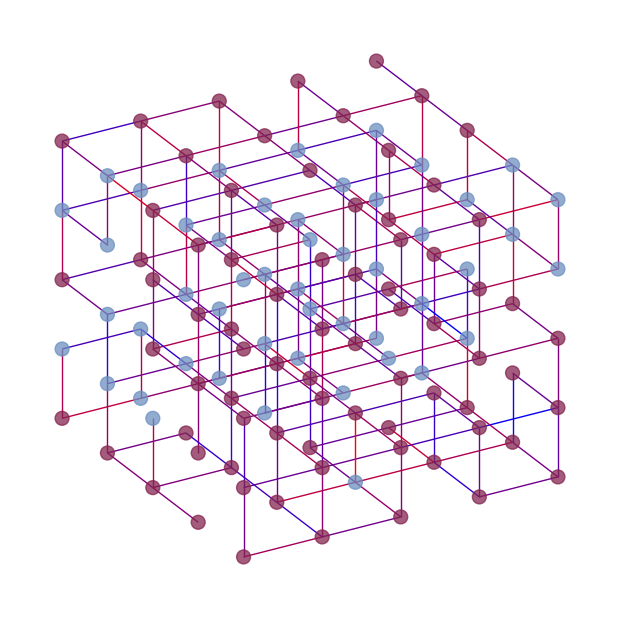

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
nodes = nx.draw_networkx_nodes(ldil.H, pos=pos, ax=ax, node_size=100,
                               node_color=ldil.get_eigV_bin_check(1),
                               cmap=credcblu, alpha=0.75)
edges = nx.draw_networkx_edges(ldil.H, pos=pos, ax=ax, edge_color=ldil.get_edge_color(), edge_cmap=red_black_blue)
fig.tight_layout(pad=0)
ax.axis('off')
# fig.colorbar(edges, ax=ax, shrink=0.7)
fig.savefig(path_data / 'ldil_flip.pdf', transparent=True, bbox_inches='tight')